In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import json

In [2]:
response = pd.read_json('https://api.atlasacademy.io/export/JP/nice_servant_lore_lang_en.json')

In [3]:
print(response)

          id  ...                                            profile
0     100100  ...  {'cv': '川澄綾子', 'illustrator': '武内崇', 'stats': ...
1     100200  ...  {'cv': '川澄綾子', 'illustrator': '武内崇', 'stats': ...
2     100300  ...  {'cv': '川澄綾子', 'illustrator': '武内崇', 'stats': ...
3     100500  ...  {'cv': '丹下桜', 'illustrator': 'ワダアルコ', 'stats':...
4     100600  ...  {'cv': '丹下桜', 'illustrator': 'ワダアルコ', 'stats':...
..       ...  ...                                                ...
297  9935400  ...  {'cv': '悠木碧', 'illustrator': '山中虎鉄', 'stats': ...
298  9935500  ...  {'cv': '杉田智和', 'illustrator': '山中虎鉄', 'stats':...
299  9935530  ...  {'cv': '鈴村健一', 'illustrator': '武内崇', 'stats': ...
300  9939130  ...  {'cv': '田中理恵', 'illustrator': 'ワダアルコ', 'stats'...
301  9941730  ...  {'cv': '下屋則子', 'illustrator': 'ReDrop', 'stats...

[302 rows x 40 columns]


In [4]:
response.columns

Index(['id', 'collectionNo', 'name', 'className', 'type', 'flag', 'rarity',
       'cost', 'lvMax', 'extraAssets', 'gender', 'attribute', 'traits',
       'starAbsorb', 'starGen', 'instantDeathChance', 'cards',
       'hitsDistribution', 'atkBase', 'atkMax', 'hpBase', 'hpMax',
       'relateQuestIds', 'growthCurve', 'atkGrowth', 'hpGrowth', 'bondGrowth',
       'expGrowth', 'expFeed', 'bondEquip', 'ascensionAdd', 'svtChange',
       'ascensionMaterials', 'skillMaterials', 'costumeMaterials', 'script',
       'skills', 'classPassive', 'noblePhantasms', 'profile'],
      dtype='object')

In [5]:
response.head()

,id,collectionNo,name,className,type,flag,rarity,cost,lvMax,extraAssets,gender,attribute,traits,starAbsorb,starGen,instantDeathChance,cards,hitsDistribution,atkBase,atkMax,hpBase,hpMax,relateQuestIds,growthCurve,atkGrowth,hpGrowth,bondGrowth,expGrowth,expFeed,bondEquip,ascensionAdd,svtChange,ascensionMaterials,skillMaterials,costumeMaterials,script,skills,classPassive,noblePhantasms,profile
0,100100,2,Altria Pendragon,saber,normal,normal,5,16,90,{'charaGraph': {'ascension': {'1': 'https://as...,female,earth,"[{'id': 2, 'name': 'genderFemale'}, {'id': 100...",102,100,210,"[quick, arts, arts, buster, buster]","{'arts': [33, 67], 'buster': [100], 'quick': [...",1734,11221,2222,15150,"[91100101, 91100102, 94026514, 94052299]",5,"[1734, 1838, 1942, 2047, 2151, 2265, 2369, 247...","[2222, 2364, 2506, 2648, 2790, 2945, 3088, 323...","[3000, 9125, 15250, 21375, 27500, 310000, 6100...","[0, 100, 400, 1000, 2000, 3500, 5600, 8400, 12...","[15000, 15010, 15020, 15030, 15040, 15050, 150...",9300010,"{'individuality': {'ascension': {}, 'costume':...",[],"{'0': {'items': [{'item': {'id': 7001, 'name':...","{'1': {'items': [{'item': {'id': 6001, 'name':...","{'100130': {'items': [{'item': {'id': 6512, 'n...",{},"[{'id': 5450, 'num': 1, 'name': 'カリスマ B', 'det...","[{'id': 34550, 'name': '対魔力 A', 'detail': '自身の...","[{'id': 100101, 'num': 1, 'card': 'buster', 'n...","{'cv': '川澄綾子', 'illustrator': '武内崇', 'stats': ..."
1,100200,3,Altria Pendragon (Alter),saber,normal,normal,4,12,80,{'charaGraph': {'ascension': {'1': 'https://as...,female,human,"[{'id': 2, 'name': 'genderFemale'}, {'id': 100...",99,99,192,"[quick, arts, arts, buster, buster]","{'arts': [33, 67], 'buster': [100], 'quick': [...",1708,10248,1854,11589,"[91100201, 91100202, 94046451]",14,"[1708, 1716, 1733, 1759, 1784, 1827, 1870, 192...","[1854, 1863, 1883, 1912, 1941, 1990, 2038, 209...","[4500, 24500, 27000, 29500, 40000, 200000, 565...","[0, 100, 400, 1000, 2000, 3500, 5600, 8400, 12...","[12000, 12010, 12020, 12030, 12040, 12050, 120...",9300050,"{'individuality': {'ascension': {}, 'costume':...",[],"{'0': {'items': [{'item': {'id': 7001, 'name':...","{'1': {'items': [{'item': {'id': 6001, 'name':...","{'100230': {'items': [{'item': {'id': 6512, 'n...",{},"[{'id': 92550, 'num': 1, 'name': '魔力放出 A', 'de...","[{'id': 34450, 'name': '対魔力 B', 'detail': '自身の...","[{'id': 100201, 'num': 1, 'card': 'buster', 'n...","{'cv': '川澄綾子', 'illustrator': '武内崇', 'stats': ..."
2,100300,4,Altria Pendragon (Lily),saber,normal,normal,4,12,80,{'charaGraph': {'ascension': {'1': 'https://as...,female,earth,"[{'id': 2, 'name': 'genderFemale'}, {'id': 100...",102,100,210,"[quick, arts, arts, buster, buster]","{'arts': [33, 67], 'buster': [100], 'quick': [...",1287,7726,1699,10623,"[91100301, 94022801]",14,"[1287, 1293, 1306, 1325, 1344, 1377, 1409, 144...","[1699, 1707, 1725, 1752, 1779, 1823, 1868, 192...","[2000, 5000, 9000, 14000, 20000, 230000, 46000...","[0, 100, 400, 1000, 2000, 3500, 5600, 8400, 12...","[12000, 12010, 12020, 12030, 12040, 12050, 120...",9300260,"{'individuality': {'ascension': {}, 'costume':...",[],"{'0': {'items': [{'item': {'id': 7001, 'name':...","{'1': {'items': [{'item': {'id': 6001, 'name':...",{},{},"[{'id': 57450, 'num': 1, 'name': '直感 B', 'deta...","[{'id': 34450, 'name': '対魔力 B', 'detail': '自身の...","[{'id': 100301, 'num': 1, 'card': 'buster', 'n...","{'cv': '川澄綾子', 'illustrator': '武内崇', 'stats': ..."
3,100500,5,Nero Claudius,saber,normal,normal,4,12,80,{'charaGraph': {'ascension': {'1': 'https://as...,female,human,"[{'id': 2, 'name': 'genderFemale'}, {'id': 100...",102,101,245,"[quick, arts, arts, buster, buster]","{'arts': [33, 67], 'buster': [100], 'quick': [...",1574,9449,1880,11753,"[91100501, 91100502, 91100503, 94035608]",9,"[1574, 1723, 1881, 2038, 2196, 2345, 2503, 265...","[1880, 2067, 2265, 2462, 2659, 2847, 3045, 323...","[3000, 9125, 15250, 21375, 27500, 290000, 5800...","[0, 100, 400, 1000, 2000, 3500, 5600, 8400, 12...","[12000, 12010, 12020, 12030, 12040, 

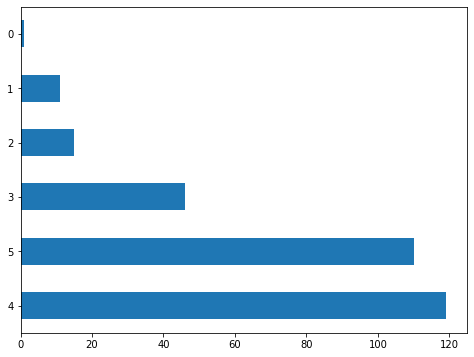

In [6]:
response.rarity.value_counts().plot(kind='barh', figsize=(8, 6) )

In [7]:
response.rarity.value_counts()

4    119
5    110
3     46
2     15
1     11
0      1
Name: rarity, dtype: int64

In [8]:
response.rarity.count()

302

In [9]:
response.pivot_table(index=['rarity', 'className'], aggfunc=lambda x: len(x.unique()))

atkBase  atkMax  attribute  ...  starAbsorb  starGen  type
rarity className                                ...                           
0      avenger            1       1          1  ...           1        1     1
1      archer             2       2          2  ...           2        2     1
       assassin           3       3          1  ...           3        3     1
       berserker          3       3          2  ...           1        1     1
       caster             1       1          1  ...           1        1     1
       rider              1       1          1  ...           1        1     1
       saber              1       1          1  ...           1        1     1
2      archer             1       1          1  ...           1        1     1
       assassin           3       3          2  ...           3        2     1
       berserker          3       3          2  ...           1        2     1
       caster             3       3          1  ...           3        2     1
       lancer             3       3          2  ...           2        3     1
       rider              2       2          1  ...           2        2     1
3      archer             6       6          2  ...           4        3     1
       assassin           6       6          2  ...           5        4     1
       avenger            1       1          1  ...           1        1     1
       berserker          4       4          2  ...           1        2     1
       caster             8       8          3  ...           3        4     1
       lancer             6       6          4  ...           3        4     1
       rider              7       7          2  ...           7        3     1
       saber              4       4          3  ...           3        3     1
       shielder           1       1          1  ...           1        1     1
4      alterEgo           2       2          2  ...           1        2     1
       archer            15      15          4  ...           4        3     1
       assassin          13      13          4  ...           6        6     1
       avenger            2       2          1  ...           1        1     1
       berserker         13      13          3  ...           2        3     1
       caster            10      10          3  ...           3        5     1
       foreigner          1       1          1  ...           1        1     1
       lancer            16      16          3  ...           6        7     1
       moonCancer         1       1          1  ...           1        1     1
       rider             11      11          3  ...           6        5     1
       ruler              3       3          2  ...           3        2     1
       saber             19      19          3  ...           7        5     1
5      alterEgo           5       5          4  ...           4        3     1
       archer            10      10          4  ...           4        2     1
       assassin           9       9          4  ...           4        6     1
       avenger            3       3          3  ...           2        2     1
       beastI             1       1          1  ...           1        1     1
       beastII            1       1          1  ...           1        1     1
       beastIIIL          1       1          1  ...           1        1     1
       beastIIIR          1       1          1  ...           1        1     1
       berserker          9       9          4  ...           2        3     1
       caster             8       8          4  ...           4        4     2
       foreigner          5       5          3  ...           4        4     1
       grandCaster        1       1          1  ...           1        1     1
       lancer            10      10          3  ...           6        4     1
       moonCancer         3       3          2  ...           3        2     1
       rider             12      12          4  ...           5       

In [10]:
df1 = response[['rarity', 'className', 'collectionNo']]
df_pivot = df1.pivot_table(index=['rarity', 'className'], aggfunc=lambda x: len(x.unique()))

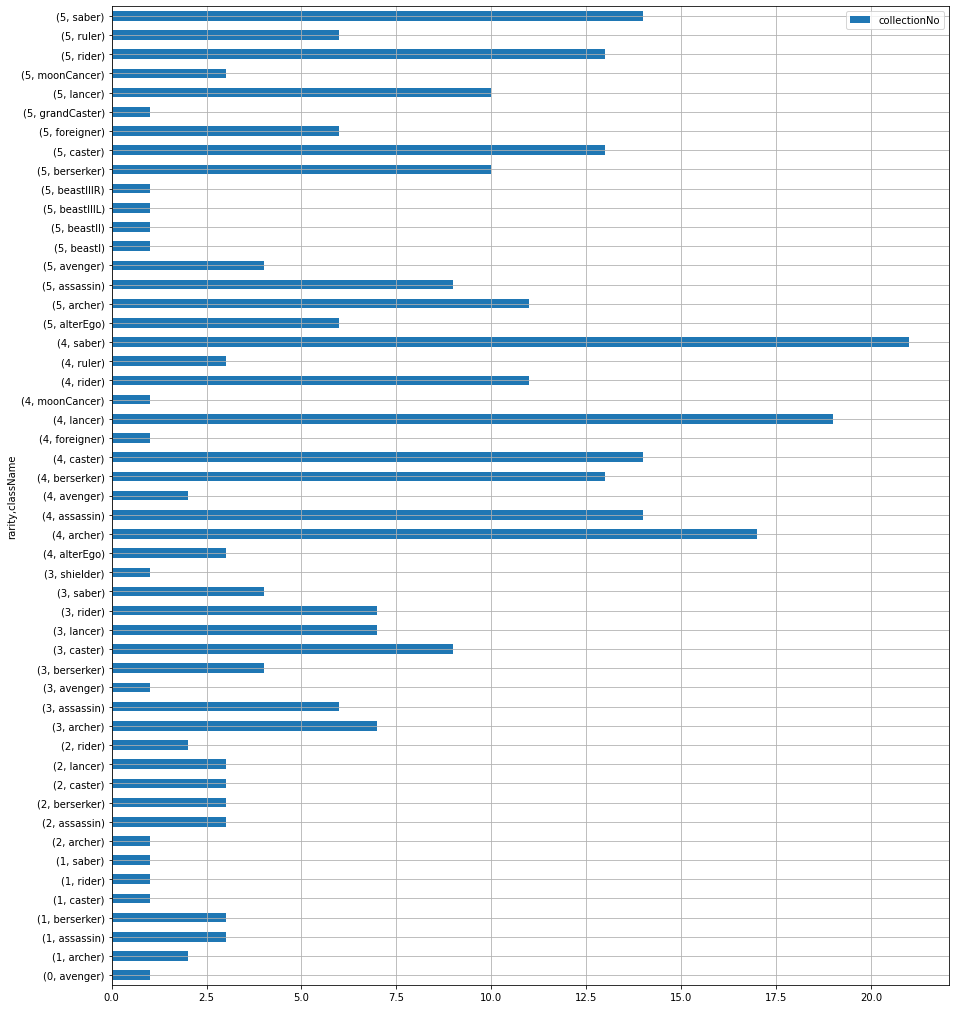

In [11]:
fig = df_pivot.plot(kind='barh', figsize=(15, 18), grid = 'True')

# plt.rcParams['figure.facecolor'] = "white"
fig.figure.savefig('distribution.png', transparent=False)

In [12]:
df_pivot.columns

Index(['collectionNo'], dtype='object')

In [13]:
df1.rarity.describe()

count    302.000000
mean       3.990066
std        1.048603
min        0.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: rarity, dtype: float64

In [14]:
df1.className.value_counts()

caster         40
saber          40
lancer         39
archer         38
assassin       35
rider          34
berserker      33
alterEgo        9
ruler           9
avenger         8
foreigner       7
moonCancer      4
beastIIIR       1
grandCaster     1
shielder        1
beastI          1
beastIIIL       1
beastII         1
Name: className, dtype: int64

In [15]:
df1.rarity.value_counts()

4    119
5    110
3     46
2     15
1     11
0      1
Name: rarity, dtype: int64

In [16]:
df_pivot

collectionNo
rarity className                
0      avenger                 1
1      archer                  2
       assassin                3
       berserker               3
       caster                  1
       rider                   1
       saber                   1
2      archer                  1
       assassin                3
       berserker               3
       caster                  3
       lancer                  3
       rider                   2
3      archer                  7
       assassin                6
       avenger                 1
       berserker               4
       caster                  9
       lancer                  7
       rider                   7
       saber                   4
       shielder                1
4      alterEgo                3
       archer                 17
       assassin               14
       avenger                 2
       berserker              13
       caster                 14
       foreigner               1
       lancer                 19
       moonCancer              1
       rider                  11
       ruler                   3
       saber                  21
5      alterEgo                6
       archer                 11
       assassin                9
       avenger                 4
       beastI                  1
       beastII                 1
       beastIIIL               1
       beastIIIR               1
       berserker              10
       caster                 13
       foreigner               6
       grandCaster             1
       lancer                 10
       moonCancer              3
       rider                  13
       ruler                   6
       saber                  14

In [17]:
df_pivot.to_csv('distribution.csv')